In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [53]:
data = pd.read_csv('Data/my_BRENT2019.csv', index_col=[0], parse_dates=[0])

In [54]:
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [55]:
rub_dol = pd.read_excel('Data/RC_F01_09_2010_T01_09_2019.xlsx', index_col=[1], parse_dates=[1])

In [56]:
rub_dol.head()

,nominal,curs,cdx
data,,,
2010-09-01,1,30.8669,Доллар США
2010-09-02,1,30.8001,Доллар США
2010-09-03,1,30.6858,Доллар США
2010-09-04,1,30.6922,Доллар США
2010-09-07,1,30.5771,Доллар США


In [58]:
rub_eur = pd.read_excel('Data/RC_F01_09_2010_T01_09_2019_E.xlsx', index_col=[1], parse_dates=[1])

In [59]:
data_w = data.resample('W').mean()

In [60]:
data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [63]:
rub_dol.drop(['nominal', 'cdx'], axis=1, inplace=True)

In [64]:
rub_dol['diff'] = rub_dol['curs'].diff()

In [65]:
rub_dol.head()

,curs,diff
data,,
2010-09-01,30.8669,NaN
2010-09-02,30.8001,-0.0668
2010-09-03,30.6858,-0.1143
2010-09-04,30.6922,0.0064
2010-09-07,30.5771,-0.1151


In [69]:
rub_dol.drop(rub_dol.index[0], axis=0, inplace=True)

In [70]:
rub_dol_w = rub_dol.resample('W').mean()
rub_dol_w.head()

,curs,diff
data,,
2010-09-05,30.726033,-0.058233
2010-09-12,30.794020,0.040300
2010-09-19,30.846720,0.037780
2010-09-26,30.999200,-0.026920
2010-10-03,30.527640,-0.087720


In [73]:
rub_eur.drop(['nominal', 'cdx'], axis=1, inplace=True)

In [74]:
rub_eur['diff'] = rub_eur['curs'].diff()
rub_eur.drop(rub_eur.index[0], axis=0, inplace=True)
rub_eur_w = rub_eur.resample('W').mean()

In [75]:
data_w.drop(['dayofmonth', 'dayofyear', 'dayofweek', 'is_prev_holiday', 'is_next_holiday'], axis=1, inplace=True)

In [76]:
data_w['usd'] = rub_dol_w['curs']
data_w['usd_diff'] = rub_dol_w['diff']
data_w['eur'] = rub_eur_w['curs']
data_w['eur_diff'] = rub_eur_w['diff']

In [78]:
data_w.loc[data_w['Значение'].isna()]

,Значение,year,month,quarter,weekofyear,is_holiday,usd,usd_diff,eur,eur_diff
Дата,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,31.40872,-0.242,42.9275,-0.10572


In [79]:
data_w['2011-10-02':'2011-10-30']

,Значение,year,month,quarter,weekofyear,is_holiday,usd,usd_diff,eur,eur_diff
Дата,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,3.166667,39.0,0.0,32.09702,0.00034,43.42556,0.01072
2011-10-09,103.476667,2011.0,10.000000,4.000000,40.0,0.0,32.52306,0.01810,43.33912,-0.03154
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,31.40872,-0.24200,42.92750,-0.10572
2011-10-23,109.756667,2011.0,10.000000,4.000000,42.0,0.0,31.06940,0.06912,42.80070,0.08090
2011-10-30,110.680000,2011.0,10.000000,4.000000,43.0,0.0,30.40712,-0.28768,42.52024,-0.15086


In [80]:
data_w.loc['2011-10-16']['Значение'] = (data_w.loc['2011-10-09']['Значение'] + data_w.loc['2011-10-23']['Значение'])/2
data_w.loc['2011-10-16']['year'] = 2011.0
data_w.loc['2011-10-16']['month'] = 10.0
data_w.loc['2011-10-16']['quarter'] = 4.0
data_w.loc['2011-10-16']['weekofyear'] = 41.0
data_w.loc['2011-10-16']['is_holiday'] = 0.0

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [86]:
data_w.loc[data_w['usd'].isna()]

,Значение,year,month,quarter,weekofyear,is_holiday,usd,usd_diff,eur,eur_diff
Дата,,,,,,,,,,
2011-01-09,94.558000,2011.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN
2012-01-08,112.974000,2012.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN
2013-01-06,110.688000,2012.8,3.2,1.6,1.0,0.000000,NaN,NaN,NaN,NaN
2015-01-11,50.908333,2015.0,1.0,1.0,2.0,0.000000,NaN,NaN,NaN,NaN
2016-01-10,35.982000,2016.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN
2017-01-08,56.578333,2017.0,1.0,1.0,1.0,0.166667,NaN,NaN,NaN,NaN
2018-01-07,67.578000,2018.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN
2019-01-06,55.916000,2018.8,3.2,1.6,1.0,0.000000,NaN,NaN,NaN,NaN


In [88]:
data_w= data_w.interpolate()

In [89]:
scaler = StandardScaler()
tsne_ = TSNE(n_components=2, random_state=42)

X = data_w.values
X_scaled = scaler.fit_transform(X)
X_tsne = tsne_.fit_transform(X_scaled)

In [90]:
cluster = DBSCAN(eps=3, leaf_size=15)
X_clusters = cluster.fit_predict(X_tsne)
data_w['cluster'] = X_clusters

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca_ = PCA(n_components=2, svd_solver='full')

X_pca = pca_.fit_transform(X_scaled)

In [93]:
data_w['pca1'] = X_pca[:, 0]
data_w['pca2'] = X_pca[:, 1]

In [94]:
data_w['rolling4'] = data_w['Значение'].rolling(window=4).mean()

In [95]:
data_w['diff'] = data_w['Значение'].diff()

In [97]:
data_w['log'] = np.log(data_w['Значение'])

In [99]:
data_w['quot'] = 0
data_w['quot'][1:] = data_w['Значение'][1:].values/data_w['Значение'][:-1].values

In [100]:
data_w.head()

,Значение,year,month,quarter,weekofyear,is_holiday,usd,usd_diff,eur,eur_diff,cluster,pca1,pca2,rolling4,diff,log,quot
Дата,,,,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0,0.000000,30.726033,-0.058233,39.268667,0.11260,0,-2.159797,0.593385,NaN,NaN,4.338806,0.000000
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0,0.166667,30.794020,0.040300,39.293360,-0.03176,1,-2.211576,0.782093,NaN,1.057333,4.352512,1.013800
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0,0.000000,30.846720,0.037780,39.977740,0.32396,0,-2.181541,0.762234,NaN,1.020000,4.365558,1.013132
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0,0.000000,30.999200,-0.026920,41.042640,0.08968,0,-2.149094,0.714993,77.875250,-0.175000,4.363332,0.997776
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0,0.000000,30.527640,-0.087720,41.351660,0.08014,0,-2.261187,0.932094,79.024167,2.693333,4.397059,1.034302


In [102]:
p=8
for i in range(1, p+1):
    data_w['t'+str(i)] = 0.0
    data_w['t'+str(i)].values[i:] = data_w['Значение'].values[:-i]

In [101]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression

In [105]:
h=1
scl = StandardScaler()
scl_y = StandardScaler()
X_r = data_w.iloc[p:-h, :].values
y = data_w['Значение'][p+h:].values.reshape((-1,1))
X_r_scaled = scl.fit_transform(X_r)
y_scaled = scl_y.fit_transform(y)

In [106]:
skb = SelectKBest(f_regression, k=5)

X_skb = skb.fit_transform(X_r_scaled, y_scaled.ravel())
list_param_skb = np.where(skb.get_support())[0]
list_param_skb

array([ 0, 13, 15, 17, 18], dtype=int64)

In [107]:
sp = SelectPercentile(f_regression)

X_sp = sp.fit_transform(X_r_scaled, y_scaled.ravel())
list_param_sp = np.where(sp.get_support())[0]
list_param_sp

array([ 0, 13, 17], dtype=int64)

In [108]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

model.fit(X_r_scaled, y_scaled.ravel())
sfm = SelectFromModel(model, max_features=5)
X_sfm = sfm.fit_transform(X_r_scaled, y_scaled.ravel())
list_param_sfm = np.where(sfm.get_support())[0]
list_param_sfm

array([ 0,  6,  8, 11, 15], dtype=int64)

In [109]:
result_list = list(set((*list_param_skb, *list_param_sp, *list_param_sfm)))
result_list

[0, 6, 8, 11, 13, 15, 17, 18]

In [142]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

In [143]:
train, test = split_data(data_w, -30)

In [144]:
X_selected = X_r_scaled[:, result_list]

In [145]:
X_train = X_selected[:train.shape[0], :]
y_train = y_scaled[:train.shape[0], :]
X_test = X_selected[train.shape[0]:, :]
y_test = y_scaled[train.shape[0]:, :]

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_list = {'max_depth': [3, 5, 10, 15], 'n_estimators': [100, 200, 300, 500, 1000], 'learning_rate': [0.1, 0.01]}

In [148]:
model_gb = GradientBoostingRegressor(random_state=42)

search = GridSearchCV(model_gb, param_grid=param_list, scoring='r2', cv=3, n_jobs=-1)
search.fit(X_train, y_train)
search.best_score_, search.best_params_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.7894110100103096,
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100})

In [149]:
model_gb_f = GradientBoostingRegressor(**search.best_params_, random_state=42)
model_gb_f.fit(X_train, y_train)
y_pred = model_gb_f.predict(X_test)

In [150]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

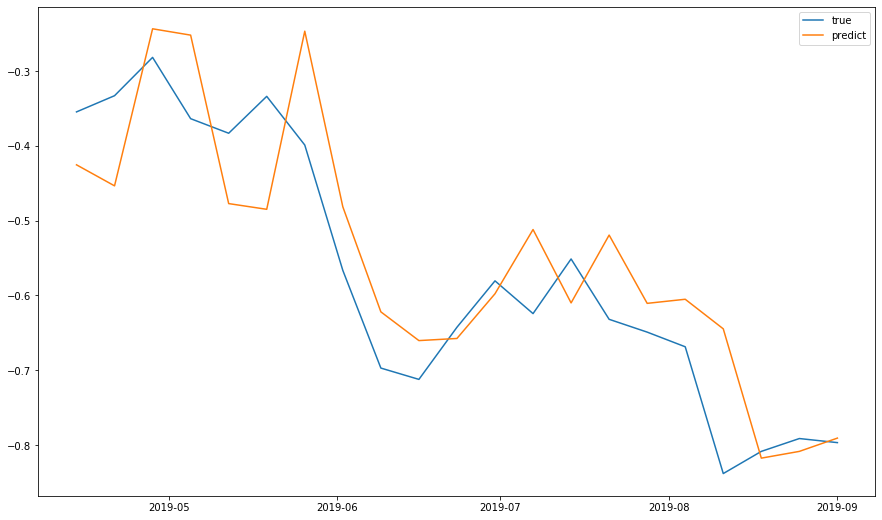

In [151]:
plt.figure(figsize=(15,9))
plt.plot(data_w.index[train.shape[0]+p+h:], y_test.ravel(), label='true')
plt.plot(data_w.index[train.shape[0]+p+h:], y_pred, label='predict')
plt.legend()

In [152]:
r2_score(y_test, y_pred)

0.7251433471619686

In [153]:
mean_absolute_error(y_test, y_pred)

0.0758740676988029

In [154]:
mean_squared_error(y_test, y_pred)

0.008395889706803878

In [155]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [156]:
mean_absolute_percentage_error(scl_y.inverse_transform(y_test), scl_y.inverse_transform(y_pred))

8.131858976266052

In [157]:
data_w.columns[result_list]

Index(['Значение', 'usd', 'eur', 'pca1', 'rolling4', 'log', 't1', 't2'], dtype='object')

На недельном ресемплинге ошибка выше чем на дневном, однако предсказания модели гораздо лучше чем при прямом прогнозировании модели ARIMA.